## Bycicle Analysis

### Mobility Analysis of Bycicle Users

Our team is participating in a study of the mobility of bycicle users. We created a class called BycicleAnalysis, which executes six methods as well as one class constructor in order to initialize the attributes of the class.

Our main goal in this analysis is to get deeper insights on the correlations between different weather conditions and the number of rented bycicles. Also, we want to identify what hours are the busiest in a given week, based on a user given start date.

Additionally, we analysed the average of total rentals for every month of the year, to get an overview of the distribution of rentals over a year. Finally, we evaluated the expected number of rentals per hour in a given month (given by user), including the standard deviation. By plotting the mean and standard deviation of rental numbers, we were able to identify more volatile week-days in a given month.

This analysis may then be used to help bike rentals to adapt better to demand on certain months & days and for certain weather conditions. Based on our analysis bike rental companies can try to minimize their operating costs, by optimizing their stocks and availability. 

Our group decided to do all tasks together as they are highly interdependent.

Four parameters are given from outside the class that can be changed by the user.
In the following, we will present our methods and findings.

In [1]:
from bycicle_analysis import BycicleAnalysis

LINK = ('https://archive.ics.uci.edu/ml/machine-learning-databases'
        '/00275/Bike-Sharing-Dataset.zip')
FILE_PATH = "../downloads"
HOUR_PATH = "./downloads/hour.csv"
CORR_COLUMNS = ['mnth', 'hum', 'windspeed', 'weathersit', 'temp', 'cnt']
object = BycicleAnalysis(LINK, FILE_PATH, HOUR_PATH, CORR_COLUMNS)

#### Method 1: Download zip file from given URL and save it into a "downloads" directory

This method downloads a zip file from a given URL and saves it into a "downloads" directory which is located in the root directory of the project.
We inserted the url and the path where we want to save the file into the class-call. First, the zip file is downloaded and opened, before the extracted file is saved in the downloads-folder. Furthermore, we included an Exception error in case the url does not exist.

In [2]:
object.download_zip()

#### Method 2: Read the csv file within the downloaded folder that includes hourly aggregations and put it into a pandas dataframe

Now we looked into the downloaded zip-file and found two csv-files. One csv-file is for daily aggregations and one for hourly aggregations. As we want to get a better understanding of the rentals in certain hours and weather conditions, we chose the hour.csv file and saved its contents into a pandas dataframe for further usage.

As shown below, the dataframe shows details of dates, times and associated weather conditions. Each row stands for one hour on a certain day. Finally, in the last column, the total count of bike rentals in the respective hour is shown.

In [4]:
object.hourly_agg()

instant     dteday  season  yr  mnth  hr  holiday  \
2011-01-01 00:00:00        1 2011-01-01       1   0     1   0        0   
2011-01-01 01:00:00        2 2011-01-01       1   0     1   1        0   
2011-01-01 02:00:00        3 2011-01-01       1   0     1   2        0   
2011-01-01 03:00:00        4 2011-01-01       1   0     1   3        0   
2011-01-01 04:00:00        5 2011-01-01       1   0     1   4        0   
...                      ...        ...     ...  ..   ...  ..      ...   
2012-12-31 19:00:00    17375 2012-12-31       1   1    12  19        0   
2012-12-31 20:00:00    17376 2012-12-31       1   1    12  20        0   
2012-12-31 21:00:00    17377 2012-12-31       1   1    12  21        0   
2012-12-31 22:00:00    17378 2012-12-31       1   1    12  22        0   
2012-12-31 23:00:00    17379 2012-12-31       1   1    12  23        0   

                     weekday  workingday  weathersit  temp   atemp   hum  \
2011-01-01 00:00:00        6           0           1  0.24  0.2879  0.81   
2011-01-01 01:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 02:00:00        6           0           1  0.22  0.2727  0.80   
2011-01-01 03:00:00        6           0           1  0.24  0.2879  0.75   
2011-01-01 04:00:00        6           0           1  0.24  0.2879  0.75   
...                      ...         ...         ...   ...     ...   ...   
2012-12-31 19:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 20:00:00        1           1           2  0.26  0.2576  0.60   
2012-12-31 21:00:00        1           1           1  0.26  0.2576  0.60   
2012-12-31 22:00:00        1           1           1  0.26  0.2727  0.56   
2012-12-31 23:00:00        1           1           1  0.26  0.2727  0.65   

                     windspeed  casual  registered  cnt  
2011-01-01 00:00:00     0.0000       3          13   16  
2011-01-01 01:00:00     0.0000       8          32   40  
2011-01-01 02:00:00     0.0000       5          27   32  
2011-01-01 03:00:00     0.0000       3          10   13  
2011-01-01 04:00:00     0.0000       0           1    1  
...                        ...     ...         ...  ...  
2012-12-31 19:00:00     0.1642      11         108  119  
2012-12-31 20:00:00     0.1642       8          81   89  
2012-12-31 21:00:00     0.1642       7          83   90  
2012-12-31 22:00:00     0.1343      13          48   61  
2012-12-31 23:00:00     0.1343      12          37   49  

[17379 rows x 17 columns]

#### Method 3: Plot a correlation matrix of month, humidity, weather situation, temperature, windspeed and the total number of bike rentals.

Now finally we can start with our analysis. For this we took the dataframe that we just created from the hourly aggregated data and created a correlation matrix. Darker colors indicate negative correlations, while brighter ones reflect positive correlations. The exact correlations are listed in a matrix below.

##### Temperature & Count:
Temperature and the number of rented bikes are positively correlated. 
Higher temperatures prove higher counts in bike rentals.
    
##### Humidity & Count:
Humidity and the number of rented bikes are negatively correlated.
Higher humidity proves a lower number of bike rentals.

Surprisingly, windspeed does not have a strong impact on the number
of bike rentals.

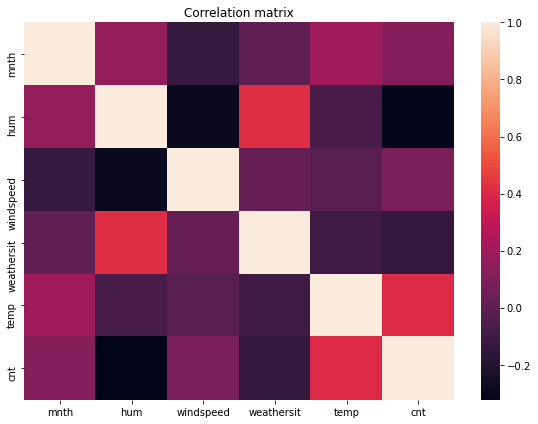

mnth       hum  windspeed  weathersit      temp       cnt
mnth        1.000000  0.164411  -0.135386    0.005400  0.201691  0.120638
hum         0.164411  1.000000  -0.290105    0.418130 -0.069881 -0.322911
windspeed  -0.135386 -0.290105   1.000000    0.026226 -0.023125  0.093234
weathersit  0.005400  0.418130   0.026226    1.000000 -0.102640 -0.142426
temp        0.201691 -0.069881  -0.023125   -0.102640  1.000000  0.404772
cnt         0.120638 -0.322911   0.093234   -0.142426  0.404772  1.000000

In [5]:
object.correlation_matrix()

#### Method 4: Hourly bike rentals based on week, given by user

In this method, we ask the user of our program to choose a start date for a week he wants to analyse. In the examples below, we analysed week 4 and week 88, which look quite different from each other. This might be because in week 88 all days are considerably higher in their number of bike rentals (up to nearly 1000), while in week 4 bike rentals go up to only about 250. This could be due to temperature and humidity conditions being worse in week 4 than in week 88.

August 8-15 2011:
Looking at an exemplary week in August. One can identify several findings:
- Afternoon rentals seem to be higher than before noon. This might be due to higher afternoon temperatures in the summer months.
- Surprisingly on the weekends rentals seem to be lower. This can either be due to the fact, that people leave the city on the weekends, or it might be due to the fact that people mainly rent bikes to get to work from Monday to Friday.

January 10-17 2011:
Looking at an exemplary week in January. One can identify several findings:
- In January the rentals tend to be higher in the morning than in the afternoon. 

Comparison:
- Both time periods follow a similar structure with three clear extremes. One in the morning, noon and evening. 
- Summer rentals seem to be more equally distributed, while in January the rentals fluctuate more.
- As expected, total rentals are lower in January than in August

Conclusion:
As we are only observing two specific weeks, we will average the hourly rentals in the next steps to get a more general view.

Select a date between 2011-01-03 - 2012-12-30:
Please enter a year (e.g. 2011): 


 2011


Please enter a month (e.g. 8 or 08): 


 08


Please enter a day (e.g. 9 or 09): 


 13


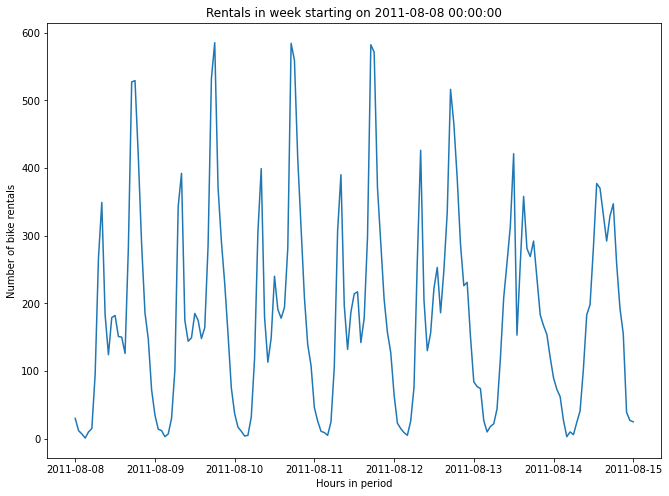

Select a date between 2011-01-03 - 2012-12-30:
Please enter a year (e.g. 2011): 


 2011


Please enter a month (e.g. 8 or 08): 


 01


Please enter a day (e.g. 9 or 09): 


 15


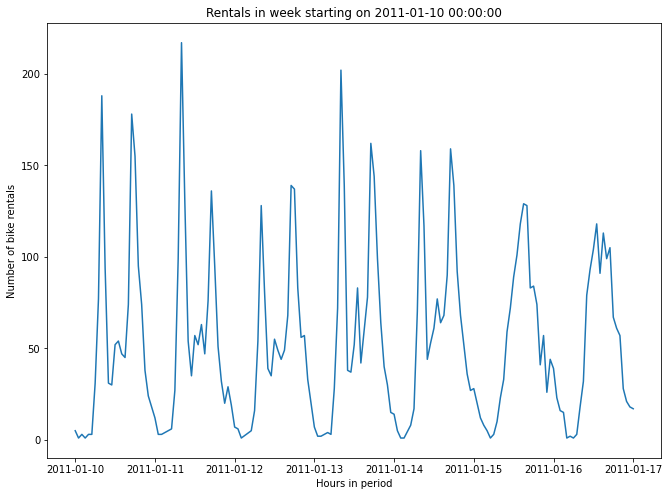

In [6]:
object.plot_weeks()
object.plot_weeks()

#### Method 5: Average total rentals by month of the year

In our fifth method we plot the average total rentals by month of the year. In the graph we can identify that the summer months have a higher rental count than the months in the winter. With 175.597 rentals August has the highest number of rentals on average, however the months from Juni until September are almost the same. This can also be explained by our correlation matrix in method 3 where we identified a positive correlation between temperature and rentals.

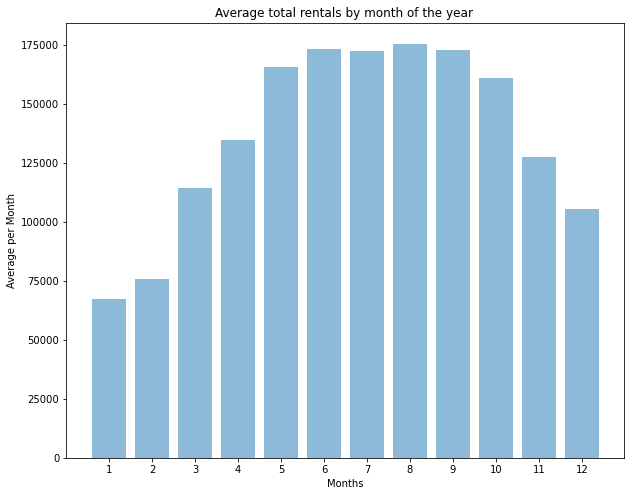

In [7]:
object.avg_total_rentals()

#### Method 6: Expected number of rentals per hour in a month, selected by the user

In the last method we asked the user to select a month. Based on the input we averaged the hourly rentals for the respective month for a week and displayed them in a line graph (red line). The week starts on Sunday. Additionally, we calculated the standard deveation of rentals, which can be seen in light blue.
Our findings overlap with tose gained from method 4. There seem to be three clear extremes, especially on weekdays. The most interesting finding is, that rentals appear to be more volatile on the weekends, as seen in the first and last local maximum.

Please select a month:


 8


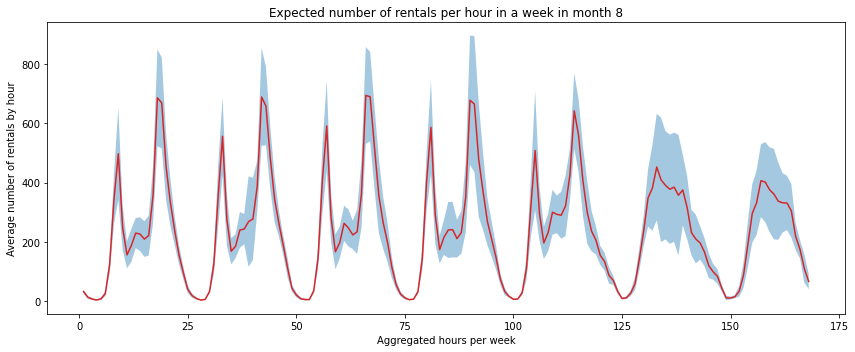

In [8]:
object.forecast()